# Interlocking analysis for Assemblies of possibly non convex Polyhedra

In [44]:
include("../Polyhedron.jl")
include("../examples.jl")
include("../decomposition.jl")
include("../plotting.jl")

plotPolyhedron (generic function with 1 method)

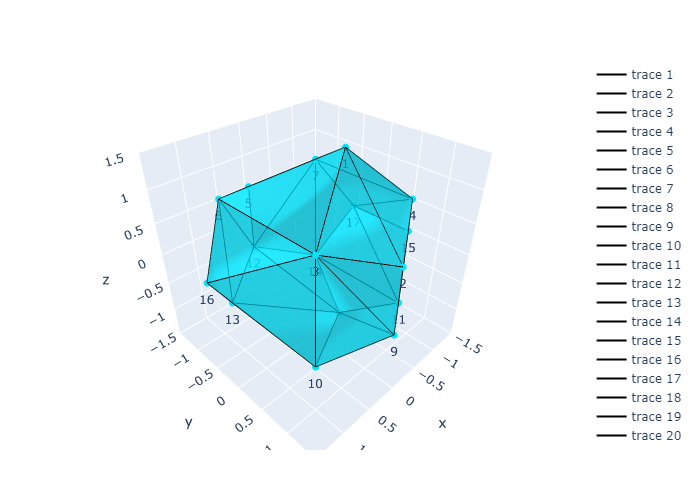

In [45]:
poly = triangulatePolyhedron(Dodecahedron)

display(poly.edges[[!isturnable(e, poly) for e in poly.edges]])

plotPolyhedron(triangulatePolyhedron(Dodecahedron))

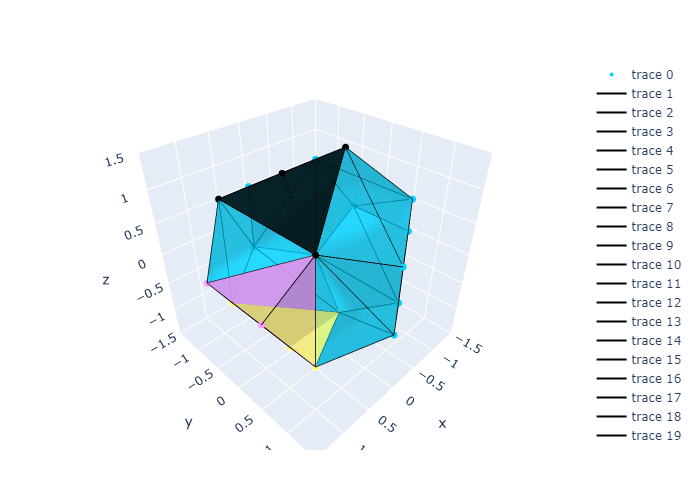

In [47]:
plotAssembly(convexDecomposition(Dodecahedron))

In [10]:
poly = triangulatePolyhedron(Dodecahedron)

poly.edges[[!isturnable(e, poly) for e in poly.edges]]

2-element Vector{Vector{Int64}}:
 [4, 17]
 [12, 17]

In [15]:
a = 3==3 ? "yes" : no

"yes"

## Experimente

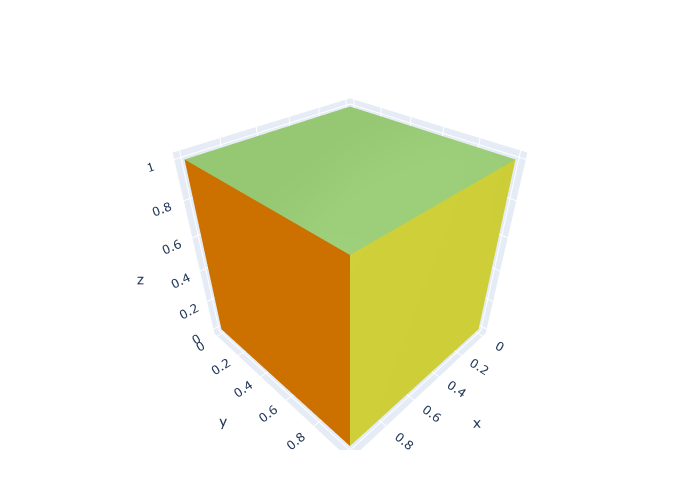

In [17]:
using PlotlyJS

p = Plot()

plot(mesh3d(
    x=[0, 1, 2, 0],
    y=[0, 0, 1, 2],
    z=[0, 2, 0, 1],
    #colorbar_title="z",
    colorscale=[[0, "gold"],
                [0.5, "mediumturquoise"],
                [1, "magenta"]],
    # Intensity of each vertex, which will be interpolated and color-coded
    intensity=[0, 0,0,0],
    # i, j and k give the vertices of triangles
    # here we represent the 4 triangles of the tetrahedron surface
    i=[0, 0, 0, 1],
    j=[1, 2, 3, 2],
    k=[2, 3, 1, 3],
    name="y",
    showscale=true
))

facecolor = repeat([
    "rgb(50, 200, 200)",
    "rgb(100, 200, 255)",
    "rgb(150, 200, 115)",
    "rgb(200, 200, 50)",
    "rgb(230, 200, 10)",
    "rgb(255, 140, 0)"
], inner=[2])

t = mesh3d(
    x=[0, 0, 1, 1, 0, 0, 1, 1],
    y=[0, 1, 1, 0, 0, 1, 1, 0],
    z=[0, 0, 0, 0, 1, 1, 1, 1],
    i=[7, 0, 0, 0, 4, 4, 2, 6, 4, 0, 3, 7],
    j=[3, 4, 1, 2, 5, 6, 5, 5, 0, 1, 2, 2],
    k=[0, 7, 2, 3, 6, 7, 1, 2, 5, 5, 7, 6],
    facecolor=facecolor)

plot(t)
